# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
# !pip install pandas
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [3]:
df = pd.read_csv(r'lab12_files\US_Baby_Names_right.csv')

# print(df.to_string()) 

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [4]:
print(len(df.index))

1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [11]:
print(df.head(10))

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [20]:
df.drop(df.columns[[0,1]], axis=1)


,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [4]:
femCount = df.loc[df.Gender == 'F', 'Gender'].count()
malCount = df.loc[df.Gender == 'M', 'Gender'].count()
print(f'female names = {femCount}')
print(f'male names = {malCount}')
print(malCount + femCount)

female names = 558846
male names = 457549
1016395


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [17]:

dfTop10 = (
    df.groupby('Name')['Count']
    .sum()
    .reset_index()
    .sort_values(by='Count', ascending=False)
    .head(10)
)
dfTop10 = dfTop10.reset_index(drop=True)

print(dfTop10)


       Name   Count
0     Jacob  242874
1      Emma  214852
2   Michael  214405
3     Ethan  209277
4  Isabella  204798
5   William  197894
6    Joshua  191551
7    Sophia  191446
8    Daniel  191440
9     Emily  190318


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

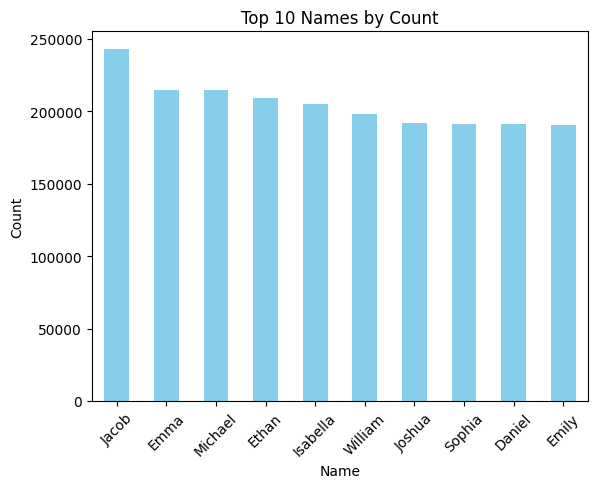

In [31]:
import matplotlib.pyplot as plt

dfTop10.plot(kind='bar', x='Name', y='Count', legend=False, color='skyblue')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 10 Names by Count')
plt.xticks(rotation=45)
plt.show()



Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [18]:
print(df.groupby(by=['Name']).size().count())

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [39]:
probability_distribution = df.set_index('Name')['Count'] / df['Count'].sum()

def generate_name():
    return np.random.choice(probability_distribution.index, p=probability_distribution.values)

generated_names = [generate_name() for _ in range(10)]
print("Wygenerowane imiona:")
print(generated_names)

Wygenerowane imiona:
['Paige', 'Jayla', 'Noah', 'Claire', 'Jennifer', 'Ethan', 'Rose', 'Chloe', 'Tyler', 'Sofia']


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [ ]:
# Jacob

# Średnia występowania imion
srednia = df['Count'].mean()
print(f"Średnia występowania imion: {srednia}")

# Mediana występowania imion
mediana = df['Count'].median()
print(f"Mediana występowania imion: {mediana}")

# Odchylenie standardowe występowania imion
odchylenie_standardowe = df['Count'].std()
print(f"Odchylenie standardowe występowania imion: {odchylenie_standardowe}")

Średnia występowania imion: 34.85012421351935
Mediana występowania imion: 11.0
Odchylenie standardowe występowania imion: 97.39734648617814


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.